In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("https://utdallas.box.com/shared/static/nhj8rs6qmyw9k16xkcjzgzgkc6t5hpla.csv")

In [ ]:
df = df.drop_duplicates()
df.duplicated().values.any() # Checking for an duplicate entries

False

In [ ]:
df = df.fillna(method="ffill")
pd.isnull(df).any()  # Checking for Null Values

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

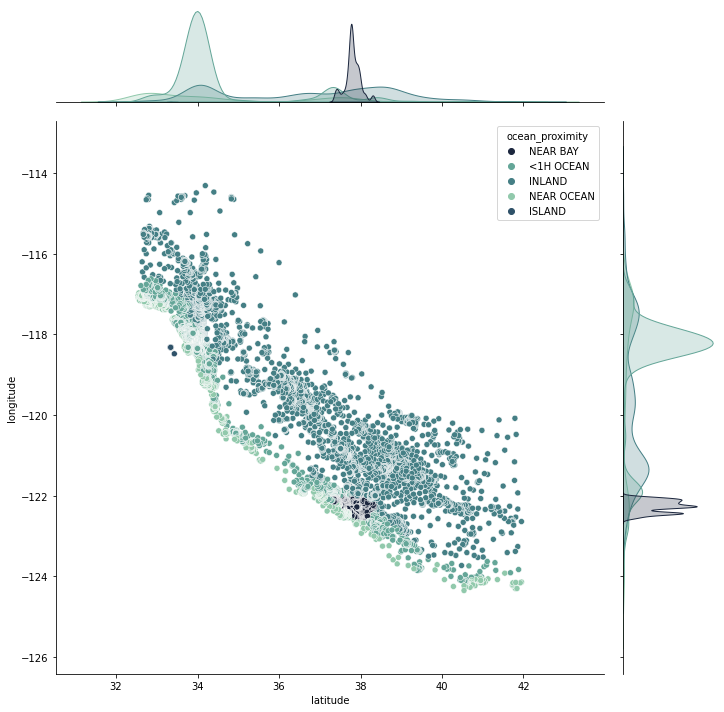

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
#plotting lattitude vs lattitude
plt.figure(figsize=(10,10))
sns.jointplot(x=df.latitude, y=df.longitude, hue=df.ocean_proximity,
              palette=('#1c273e', '#64a698', '#457f85','#91c9ac', '#2f5269'),size = 10)
plt.show()
sns.despine

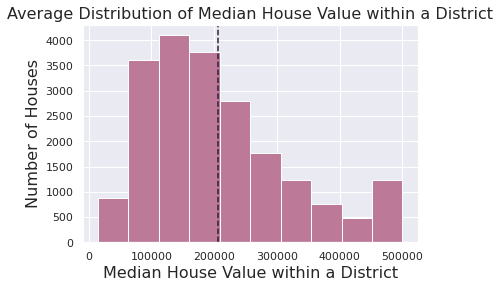

In [ ]:
sns.set()
plt.hist(df.median_house_value, color='#bd7a98')
plt.xlabel('Median House Value within a District', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median House Value within a District', fontsize=16)

plt.axvline(df.median_house_value.mean(), color='#2d1e3e', linestyle='dashed')

In [ ]:
mean_house_value = df["median_house_value"].mean()
print(mean_house_value)

206855.81690891474


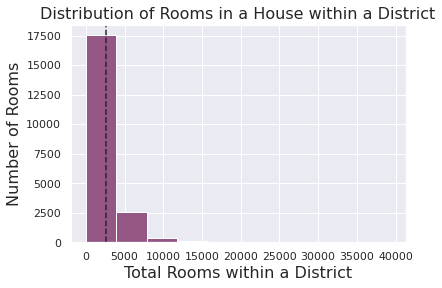

In [ ]:
plt.hist(df.total_rooms, color='#945785')
plt.xlabel('Total Rooms within a District', fontsize=16)
plt.ylabel('Number of Rooms', fontsize=16)
plt.title('Distribution of Rooms in a House within a District', fontsize=16)

plt.axvline(df.total_rooms.mean(), color='#2d1e3e', linestyle='dashed')

Text(0, 0.5, 'Median House Value')

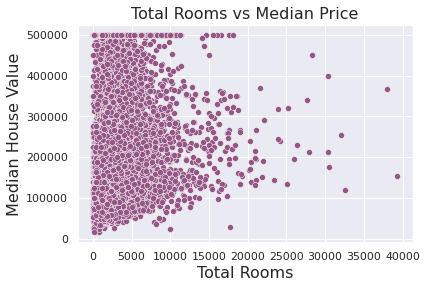

In [ ]:
ax = sns.scatterplot(x="total_rooms", y="median_house_value", data=df,color='#945785')
ax.set_title('Total Rooms vs Median Price', fontsize=16)
ax.set_xlabel("Total Rooms", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

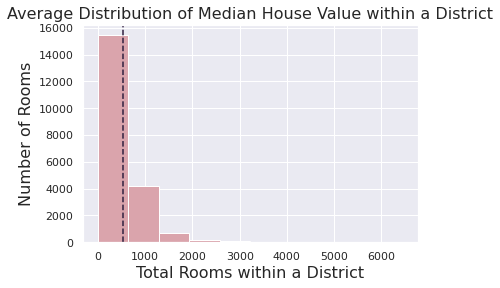

In [ ]:
plt.hist(df.total_bedrooms, color='#daa4ac')
plt.xlabel('Total Rooms within a District', fontsize=16)
plt.ylabel('Number of Rooms', fontsize=16)
plt.title('Average Distribution of Median House Value within a District', fontsize=16)

plt.axvline(df.total_bedrooms.mean(), color='#2d1e3e', linestyle='dashed')

Text(0, 0.5, 'Median House Value')

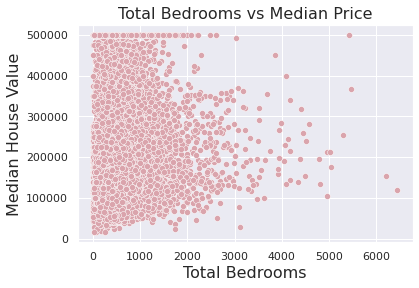

In [ ]:
ax = sns.scatterplot(x="total_bedrooms", y="median_house_value", data=df, color='#daa4ac')
ax.set_title('Total Bedrooms vs Median Price', fontsize=16)
ax.set_xlabel("Total Bedrooms", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

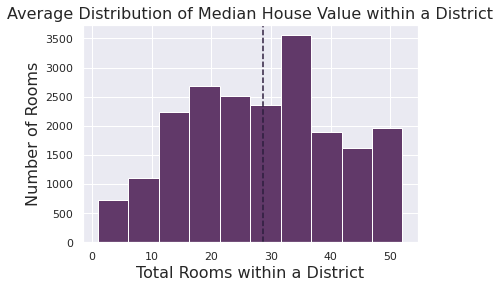

In [ ]:
plt.hist(df.housing_median_age, color='#613969')
plt.xlabel('Total Rooms within a District', fontsize=16)
plt.ylabel('Number of Rooms', fontsize=16)
plt.title('Average Distribution of Median House Value within a District', fontsize=16)

plt.axvline(df.housing_median_age.mean(), color='#2d1e3e', linestyle='dashed')

Text(0, 0.5, 'Median House Value')

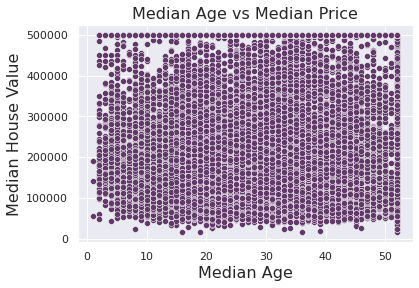

In [ ]:
ax = sns.scatterplot(x="housing_median_age", y="median_house_value", data=df, color='#613969')
ax.set_title('Median Age vs Median Price', fontsize=16)
ax.set_xlabel("Median Age", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

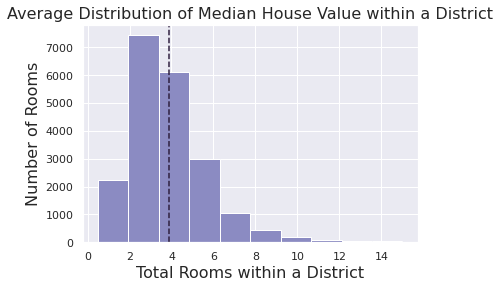

In [ ]:
df.median_income = df.median_income
plt.hist(df.median_income, color='#8b8bc2')
plt.xlabel('Total Rooms within a District', fontsize=16)
plt.ylabel('Number of Rooms', fontsize=16)
plt.title('Average Distribution of Median House Value within a District', fontsize=16)

plt.axvline(df.median_income.mean(), color='#2d1e3e', linestyle='dashed')

Text(0, 0.5, 'Median House Value')

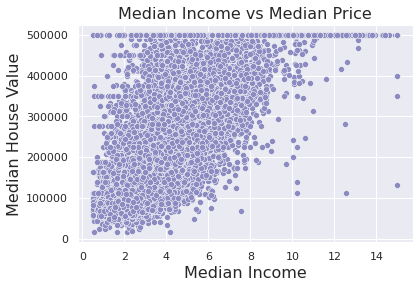

In [ ]:
ax = sns.scatterplot(x="median_income", y="median_house_value", data=df, color='#8b8bc2')
ax.set_title('Median Income vs Median Price', fontsize=16)
ax.set_xlabel("Median Income", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

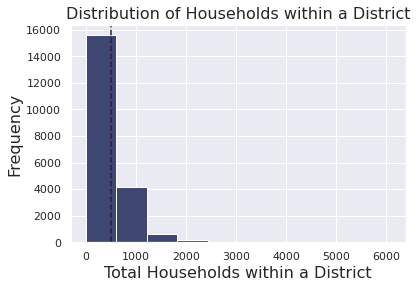

In [ ]:
plt.hist(df.households, color='#3e4872')
plt.xlabel('Total Households within a District', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Households within a District', fontsize=16)

plt.axvline(df.households.mean(), color='#2d1e3e', linestyle='dashed')

Text(0, 0.5, 'Median House Value')

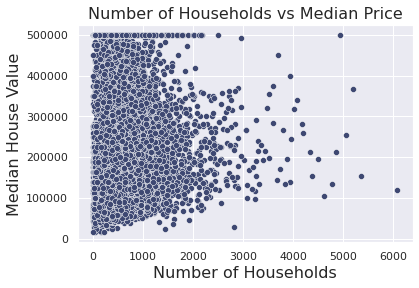

In [ ]:
ax = sns.scatterplot(x="households", y="median_house_value", data=df, color='#3e4872')
ax.set_title("Number of Households vs Median Price", fontsize=16)
ax.set_xlabel('Number of Households', fontsize=16)
ax.set_ylabel("Median House Value", fontsize = 16)

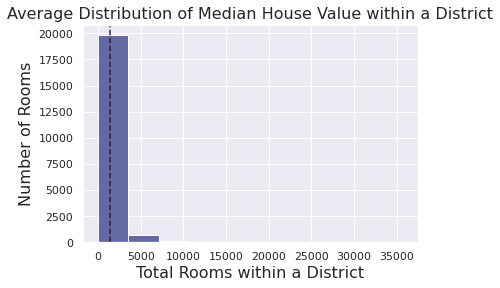

In [ ]:
plt.hist(df.population, color='#646a9f')
plt.xlabel('Total Rooms within a District', fontsize=16)
plt.ylabel('Number of Rooms', fontsize=16)
plt.title('Average Distribution of Median House Value within a District', fontsize=16)

plt.axvline(df.population.mean(), color='#2d1e3e', linestyle='dashed')

Text(0, 0.5, 'Median House Value')

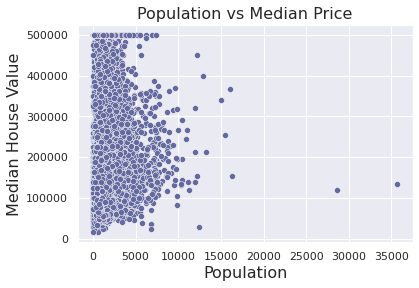

In [ ]:
ax = sns.scatterplot(x="population", y="median_house_value", data=df, color='#646a9f')
ax.set_title('Population vs Median Price', fontsize=16)
ax.set_xlabel("Population", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

Text(0.5, 1.0, 'Distribution of Houses Based on Proximity to Ocean')

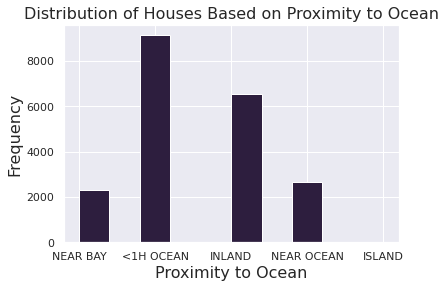

In [ ]:
plt.hist(df.ocean_proximity, color='#2d1e3e')
plt.xlabel('Proximity to Ocean', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Houses Based on Proximity to Ocean', fontsize=16)

Text(0, 0.5, 'Median House Value')

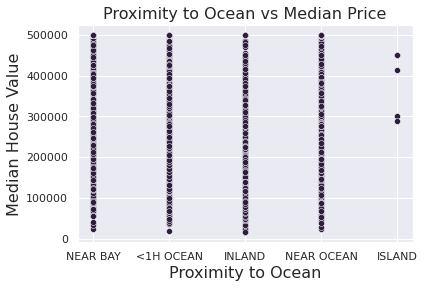

In [ ]:
ax = sns.scatterplot(x="ocean_proximity", y="median_house_value", data=df,color='#2d1e3e')
ax.set_title('Proximity to Ocean vs Median Price', fontsize=16)
ax.set_xlabel("Proximity to Ocean", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

Text(0, 0.5, 'Median House Value')

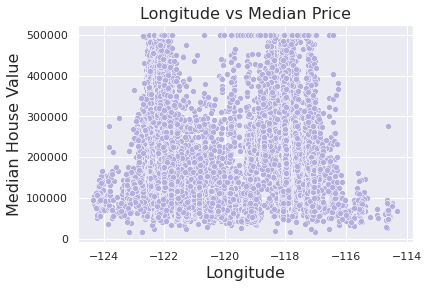

In [ ]:
ax = sns.scatterplot(x="longitude", y="median_house_value", data=df, color='#b3aede')
ax.set_title('Longitude vs Median Price', fontsize=16)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

Text(0, 0.5, 'Median House Value')

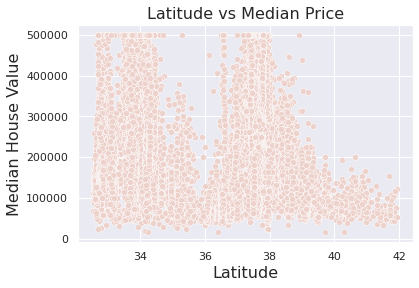

In [ ]:
ax = sns.scatterplot(x="latitude", y="median_house_value", data=df,color='#edd1cb')
ax.set_title('Latitude vs Median Price', fontsize=16)
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Median House Value", fontsize=16)

In [ ]:
#target variable: median_house_value
#some attributes to consider: median_income, households, total_rooms, total_bedrooms

In [ ]:
#setting the dependent and independent variables based on my selection
X = df[["median_income", "total_rooms", "households"]]
Y = df['median_house_value']

s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

In [ ]:
#splitting into test and train groups
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 3)
(4128, 3)
(16512,)
(4128,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 81267.90187172737
R2 score is 0.4994368030734012


In [ ]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 82574.00058144156
R2 score is 0.5057951416252224


In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)

model = smRegression.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     5490.
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:47:16   Log-Likelihood:            -2.1011e+05
No. Observations:               16512   AIC:                         4.202e+05
Df Residuals:                   16508   BIC:                         4.203e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.065e+05    632.520    326.465      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = df[["median_income", "total_rooms", "households", "latitude", "longitude"]]
Y = df['median_house_value']

s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

In [ ]:
#splitting into test and train groups
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 5)
(4128, 5)
(16512,)
(4128,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 73799.98649889437
R2 score is 0.5872059912562353


In [ ]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 74696.6171049651
R2 score is 0.5955896834370398


In [ ]:
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)

model = smRegression.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     4696.
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:47:17   Log-Likelihood:            -2.0851e+05
No. Observations:               16512   AIC:                         4.170e+05
Df Residuals:                   16506   BIC:                         4.171e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.065e+05    574.433    359.516      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
